In [13]:
import json
import os
import h5py
import cv2 as cv
import matplotlib.pyplot as plt

In [14]:
def loadJson(file_name):
    """简易加载json"""
    with open(file_name, "r") as f:
        js = json.load(f)
    return js


def saveJson(file, file_name):
    """简易保存json"""
    with open(file_name, "w") as f:
        json.dump(file, f)

In [16]:
i = 34
phase = "test"
path_anno_coco = f"../data/anno/coco_512/{phase}.json"
anno = loadJson(path_anno_coco)
path_img_prefix = f"../data/anno/coco_512/{phase}/"

path_img = os.path.join(path_img_prefix, anno["images"][i]["file_name"])
image_id = anno["images"][i]["id"]
with h5py.File(path_img) as f:
    img = f['image'][:]

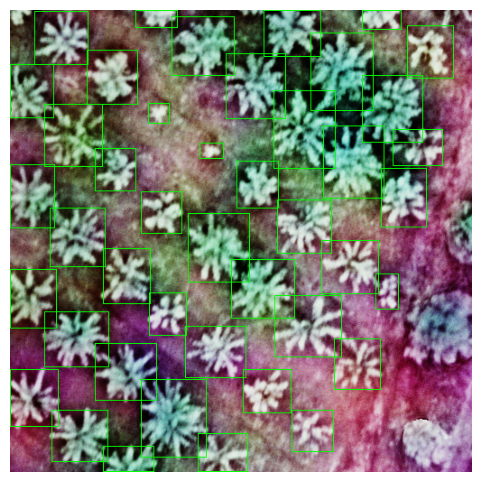

In [20]:
img_show = img[:,:,[55,28,7]].copy()
for obj in anno["annotations"]:
    if obj['image_id'] == image_id:
        xmin, ymin, w, h = obj["bbox"]
        xmax = xmin + w
        ymax = ymin + h
        xmin, ymin, xmax, ymax = list(map(int, (xmin, ymin, xmax, ymax)))
        img_show = cv.rectangle(img_show, (xmin, ymin), (xmax, ymax), (0, 255, 0))
plt.figure(0, (9, 6))
plt.imshow(img_show)
plt.axis("off")
plt.xticks([])
plt.yticks([])
plt.show()